In [1]:
import tensorflow_datasets as tfds

# Load the dataset in plain text format
imdb_plaintext, info_plain_text = tfds.load(
    "imdb_reviews", with_info=True, as_supervised=True
)

# Load the dataset with subwords tokenization
imdb_subwords, info_subwords = tfds.load(
    "imdb_reviews/subwords8k", with_info=True, as_supervised=True
)

In [2]:
# Display features of the plain text dataset
info_plain_text.features

# Display features of the subwords tokenized dataset
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})

In [3]:
# Encoder for the subwords tokenized dataset
tkr_sw = info_subwords.features["text"].encoder

# Decode example reviews from the subwords tokenized dataset
for example in imdb_subwords["train"].take(2):
    print(tkr_sw.decode(example[0]))

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [4]:
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [5]:
for example in imdb_subwords["train"].take(2):
    print(example)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [6]:
tkr_sw = info_subwords.features["text"].encoder
for example in imdb_subwords["train"].take(2):
    print(tkr_sw.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [7]:
# Extract and decode sentences from the plain text dataset

train_data = imdb_plaintext["train"]


training_sentences = []

for s, _ in train_data:

    training_sentences.append(s.numpy().decode("utf8"))

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Define the vocabulary size and the out-of-vocabulary token
vocab_size = 10000
oov_tok = "<OOV>"

tkr_plaintext = Tokenizer(num_words=10000, oov_token=oov_tok)
tkr_plaintext.fit_on_texts(training_sentences)

# Initialize the tokenizer
sequences = tkr_plaintext.texts_to_sequences(training_sentences)

In [ ]:
# Fit the tokenizer on the training sentences
tkr_plaintext.fit_on_texts(training_sentences)

# Convert the sentences to sequences of integers
sequences = tkr_plaintext.texts_to_sequences(training_sentences)

In [9]:
tkr_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [10]:
len(tkr_plaintext.word_index)

88583

In [11]:
print(tkr_sw.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [12]:
tk_string = tkr_sw.encode(training_sentences[0])
print(tk_string)

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]


In [13]:
og_string = tkr_sw.decode(tk_string)
print(og_string)

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


In [14]:
# Sample text to be tokenized

sample_string = "Tensorflow, from basics to mastery"

# Tokenizing the sample string using the plaintext tokenizer


tk_string = tkr_plaintext.texts_to_sequences([sample_string])

print("Tokenized string is {}".format(tk_string))


# Decoding the tokenized string back to text using the plaintext tokenizer


og_string = tkr_plaintext.sequences_to_texts(tk_string)

print("The original string: {}".format(og_string))

Tokenized string is [[1, 37, 1, 6, 1]]
The original string: ['<OOV> from <OOV> to <OOV>']


In [15]:
# Tokenizing the sample string using the subwords tokenizer

tk_string = tkr_sw.encode(sample_string)

print("Tokenized string is {}".format(tk_string))


# Decoding the tokenized string back to text using the subwords tokenizer


og_string = tkr_sw.decode(tk_string)

print("The original string: {}".format(og_string))

Tokenized string is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: Tensorflow, from basics to mastery


In [16]:
# Decoding each token back to text using the subwords tokenizer
for ts in tk_string:

    print("{}----->{}".format(ts, tkr_sw.decode([ts])))

6307----->Ten
2327----->sor
2934----->flow
2----->, 
48----->from 
4249----->basi
4429----->cs 
7----->to 
2652----->master
8050----->y


In [17]:
# Setting the buffer size for shuffling the dataset
buffer_size = 10000

# Setting the batch size for batching the dataset
batch_size = 64

# Splitting the subwords tokenized dataset into training and testing sets
train_data, test_data = (
    imdb_subwords["train"],
    imdb_subwords["test"],
)

# Shuffling and batching the training dataset
train_dataset = train_data.shuffle(buffer_size)
train_dataset = train_dataset.padded_batch(batch_size)

# Batching the testing dataset (no need to shuffle)
test_dataset = test_data.padded_batch(batch_size)

In [18]:
import tensorflow as tf


# Define the embedding dimension

embeding_dim = 64


# Build the sequential model

model = tf.keras.Sequential(

    [

        tf.keras.layers.Embedding(tkr_sw.vocab_size, embeding_dim),

        tf.keras.layers.GlobalAveragePooling1D(),

        tf.keras.layers.Dense(6, activation="relu"),

        tf.keras.layers.Dense(1, activation="sigmoid"),

    ]
)

In [19]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524237 (2.00 MB)
Trainable params: 524237 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Compile the model with loss function and optimizer
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Fit the model on the training dataset
histoy = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 72s 160ms/step - loss: 0.6734 - accuracy: 0.6129 - val_loss: 0.6208 - val_accuracy: 0.7590
Epoch 2/10
391/391 [==============================] - 55s 139ms/step - loss: 0.5166 - accuracy: 0.8032 - val_loss: 0.4447 - val_accuracy: 0.8418
Epoch 3/10
391/391 [==============================] - 50s 128ms/step - loss: 0.3686 - accuracy: 0.8715 - val_loss: 0.3609 - val_accuracy: 0.8675
Epoch 4/10
391/391 [==============================] - 53s 135ms/step - loss: 0.2982 - accuracy: 0.8950 - val_loss: 0.3280 - val_accuracy: 0.8748
Epoch 5/10
391/391 [==============================] - 53s 133ms/step - loss: 0.2598 - accuracy: 0.9082 - val_loss: 0.3144 - val_accuracy: 0.8760
Epoch 6/10
391/391 [==============================] - 54s 134ms/step - loss: 0.2327 - accuracy: 0.9177 - val_loss: 0.3104 - val_accuracy: 0.8783
Epoch 7/10
391/391 [==============================] - 52s 132ms/step - loss: 0.2152 - accuracy: 0.9254 - val_loss: 0.3094 - val_ac

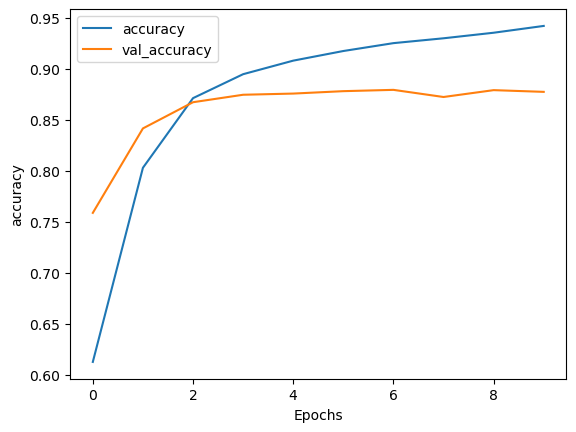

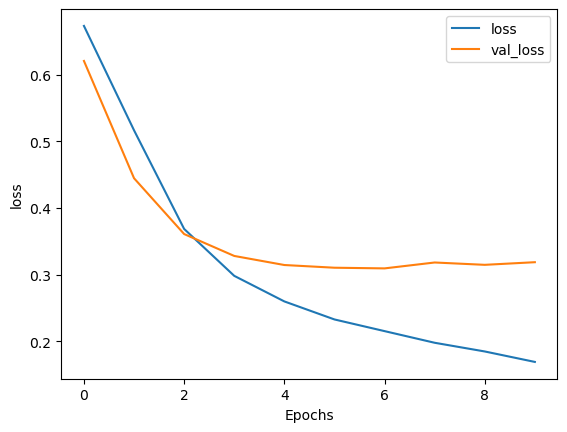

In [22]:
import matplotlib.pyplot as plt


# Function to plot the training history
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.show()


# Plot accuracy and loss graphs
plot_graphs(histoy, "accuracy")
plot_graphs(histoy, "loss")

In [23]:
# Save the trained model to a file
model.save("imdb_model.h5")

C:\Users\AI Tech\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
